In [1]:
import pandas as pd

In [95]:
filename = "time_series_19-covid-Confirmed.csv"
df = pd.read_csv(filename)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


In [16]:
# total by day
df.iloc[:,4:].sum(axis=0) 

1/22/20       555
1/23/20       653
1/24/20       941
1/25/20      1434
1/26/20      2118
1/27/20      2927
1/28/20      5578
1/29/20      6166
1/30/20      8234
1/31/20      9927
2/1/20      12038
2/2/20      16787
2/3/20      19881
2/4/20      23892
2/5/20      27635
2/6/20      30817
2/7/20      34391
2/8/20      37120
2/9/20      40150
2/10/20     42762
2/11/20     44802
2/12/20     45221
2/13/20     60368
2/14/20     66885
2/15/20     69030
2/16/20     71224
2/17/20     73258
2/18/20     75136
2/19/20     75639
2/20/20     76197
2/21/20     76823
2/22/20     78579
2/23/20     78965
2/24/20     79568
2/25/20     80413
2/26/20     81395
2/27/20     82754
2/28/20     84120
2/29/20     86011
3/1/20      88369
3/2/20      90306
3/3/20      92840
3/4/20      95120
3/5/20      97882
3/6/20     101784
3/7/20     105821
3/8/20     109795
3/9/20     113561
3/10/20    118592
3/11/20    125865
3/12/20    128343
3/13/20    145193
3/14/20    156094
3/15/20    167446
3/16/20    181527
3/17/20   

In [35]:
countries = pd.DataFrame(df.iloc[:,4:].sum(axis=1)).set_index(df["Country/Region"])
countries

,0
Country/Region,
Thailand,3025
Japan,14471
Singapore,5673
Nepal,56
Malaysia,6402
Canada,1495
Australia,2179
Australia,950
Australia,1019


In [40]:
countries.loc["Canada", : ]

,0
Country/Region,
Canada,1495
Canada,1847
Canada,648
Canada,578
Canada,53
Canada,76
Canada,64
Canada,44
Canada,15


In [5]:
len(df)

477

In [96]:
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [97]:
# specify coordinate reference system
crs = {'init': 'espg:4320'}

In [98]:
geometry = [Point(xy) for xy in zip(df["Long"], df["Lat"])]
geometry[:2]

In [99]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,geometry
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,70,75,82,114,147,177,212,272,322,POINT (101.00000 15.00000)
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,701,773,839,825,878,889,924,963,POINT (138.00000 36.00000)
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,200,212,226,243,266,313,345,385,POINT (103.83330 1.28330)
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,POINT (84.25000 28.16670)
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,197,238,428,566,673,790,900,1030,POINT (112.50000 2.50000)


In [100]:
# total infected in country
geo_df["population"] = df.iloc[:,4:].sum(axis=1)

In [ ]:
street_map = gpd.read_file("ne_10m_admin_0_countries_lakes.shp")
fig,ax - plt.subplots()
street_map.plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
street_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df[geo_df["population"] < 1000].plot(ax=ax, markersize=20, color="yellow", marker="o", label="<1000")
geo_df[geo_df["population"] >= 1000].plot(ax=ax, markersize=20, color="red", marker="^", label=">1000")
plt.legend(prop={'size':15})

In [108]:
sorted(geo_df["Country/Region"].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cruise Ship',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Holy See',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ire

In [125]:
us = geo_df[geo_df["Country/Region"] == "US"]
us = us.set_index('Province/State')
us = us.T
us = us.iloc[3:,:]
us.head()

Province/State,Washington,New York,California,Massachusetts,Diamond Princess,Grand Princess,Georgia,Colorado,Florida,New Jersey,...,"Bon Homme, SD","Socorro, NM","Bernalillo, NM","Oakland, MI","Wayne, MI","New Castle, DE",Alabama,Puerto Rico,Guam,Virgin Islands
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
us.loc['3/1/20']

Province/State
Washington               0
New York                 0
California               0
Massachusetts            0
Diamond Princess        44
Grand Princess           0
Georgia                  0
Colorado                 0
Florida                  0
New Jersey               0
Oregon                   0
Texas                    0
Illinois                 0
Pennsylvania             0
Iowa                     0
Maryland                 0
North Carolina           0
South Carolina           0
Tennessee                0
Virginia                 0
Arizona                  0
Indiana                  0
Kentucky                 0
District of Columbia     0
Nevada                   0
New Hampshire            0
Minnesota                0
Nebraska                 0
Ohio                     0
Rhode Island             0
                        ..
Bucks, PA                0
Hanover, VA              0
Lancaster, SC            0
Sullivan, TN             0
Johnson, IN              0
Howard, IN   

In [128]:
us.loc['3/10/20':'3/20/20']

Province/State,Washington,New York,California,Massachusetts,Diamond Princess,Grand Princess,Georgia,Colorado,Florida,New Jersey,...,"Bon Homme, SD","Socorro, NM","Bernalillo, NM","Oakland, MI","Wayne, MI","New Castle, DE",Alabama,Puerto Rico,Guam,Virgin Islands
3/10/20,267,173,144,92,46,21,17,15,15,15,...,0,0,0,0,0,0,0,0,0,0
3/11/20,366,220,177,95,46,21,23,34,28,23,...,0,0,0,0,0,0,0,0,0,0
3/12/20,442,328,221,108,46,21,31,45,35,29,...,0,0,0,0,0,0,0,0,0,0
3/13/20,568,421,282,123,46,21,42,49,50,29,...,0,0,0,0,0,0,5,0,0,0
3/14/20,572,525,340,138,46,21,66,101,76,69,...,0,0,0,0,0,0,6,3,0,1
3/15/20,643,732,426,164,46,21,99,131,115,98,...,0,0,0,0,0,0,12,5,3,1
3/16/20,904,967,557,197,47,20,121,160,155,178,...,0,0,0,0,0,0,29,5,3,1
3/17/20,1076,1706,698,218,47,21,146,160,216,267,...,0,0,0,0,0,0,39,5,3,2
3/18/20,1014,2495,751,218,47,21,199,184,314,267,...,0,0,0,0,0,0,46,5,5,2
3/19/20,1376,5365,952,328,47,22,287,277,417,742,...,0,0,0,0,0,0,78,5,12,3


In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})
import matplotlib.dates as mdates

In [139]:
import warnings
warnings.filterwarnings("ignore")

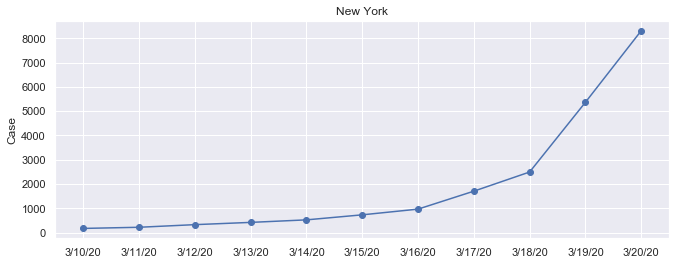

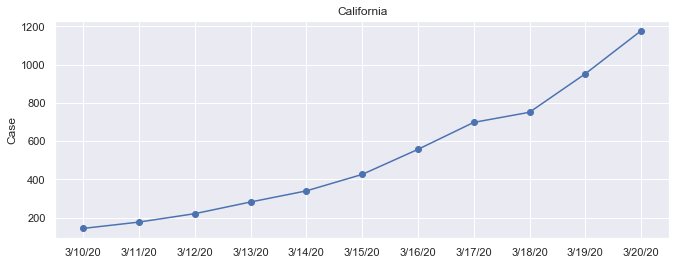

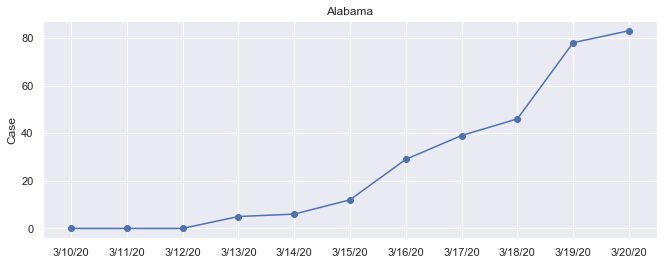

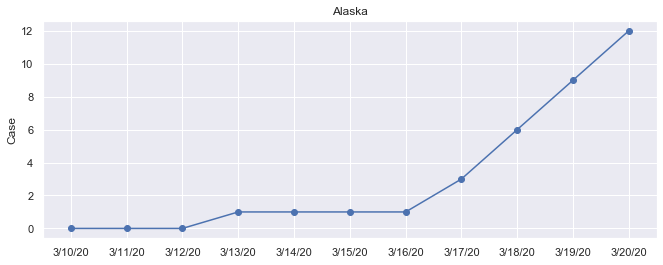

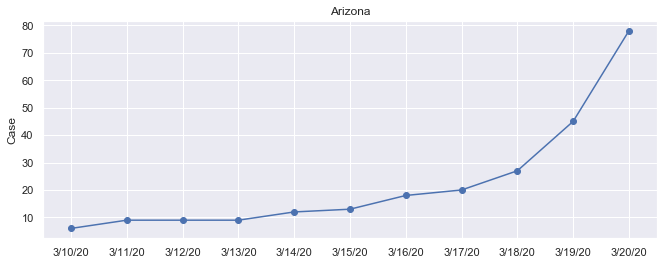

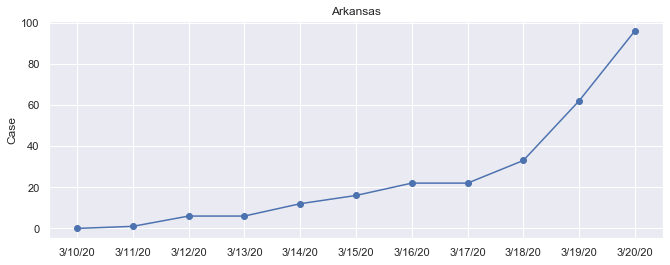

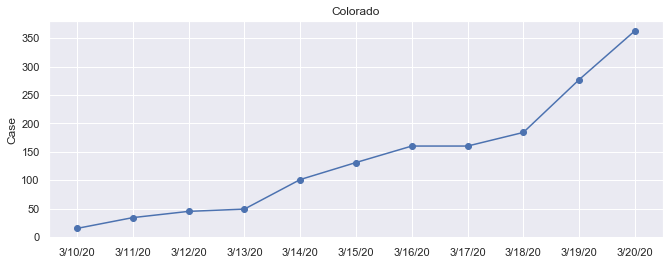

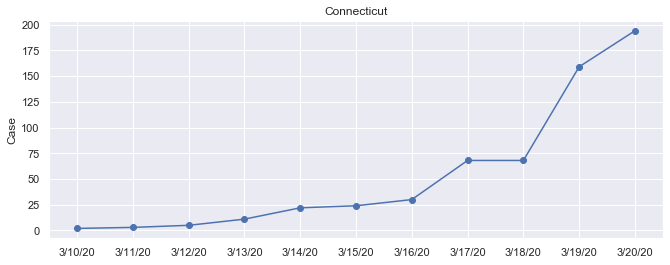

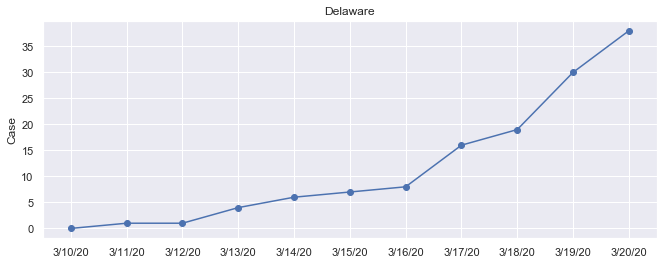

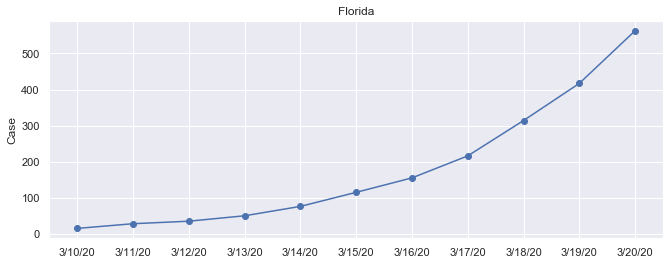

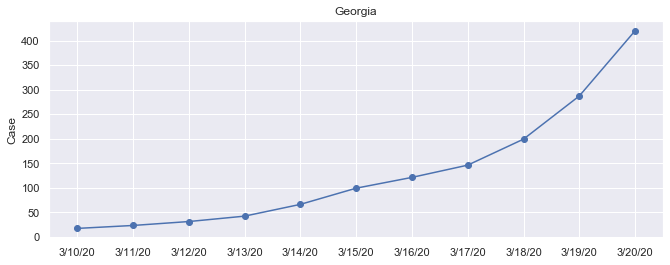

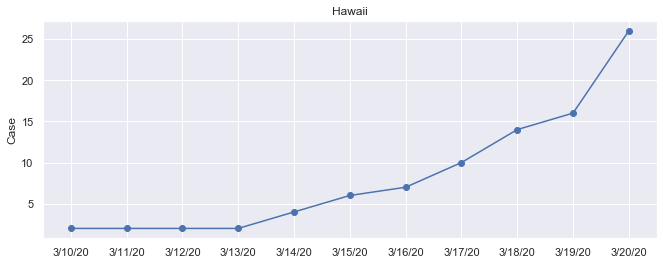

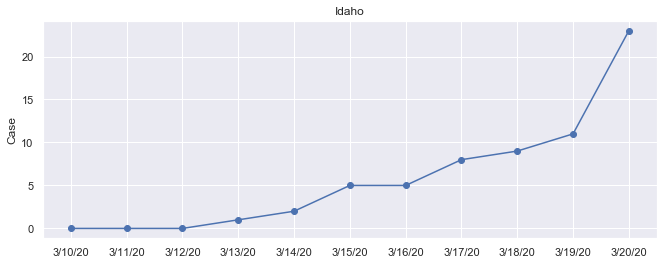

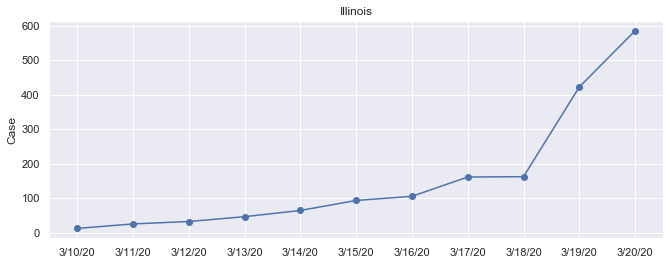

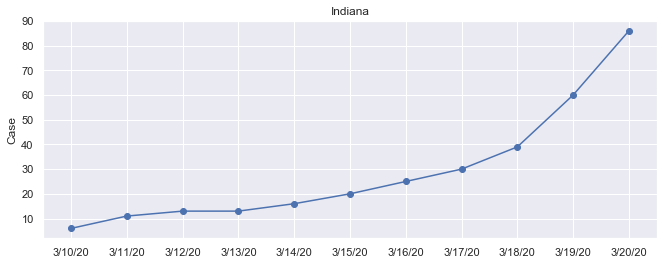

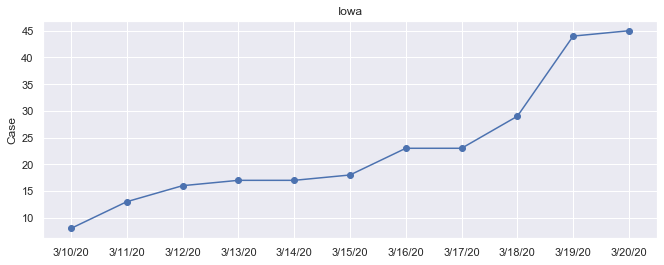

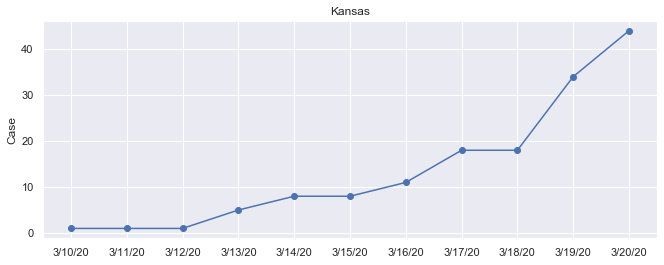

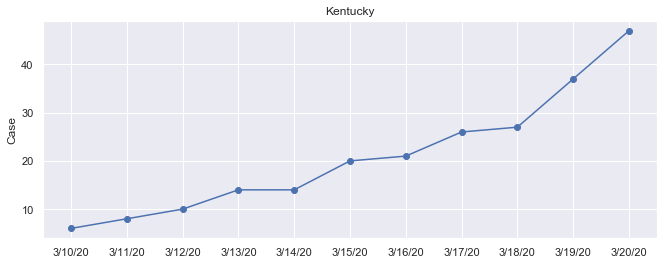

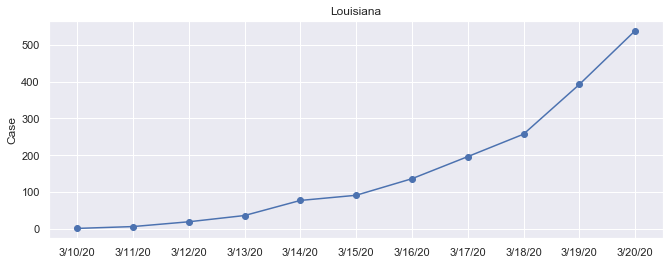

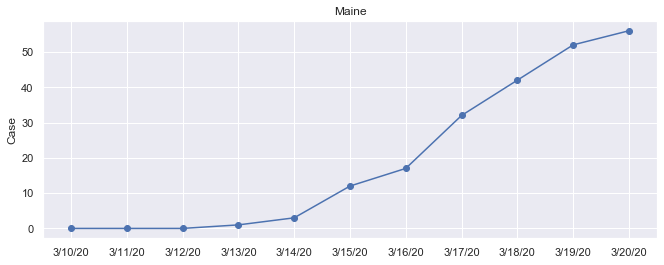

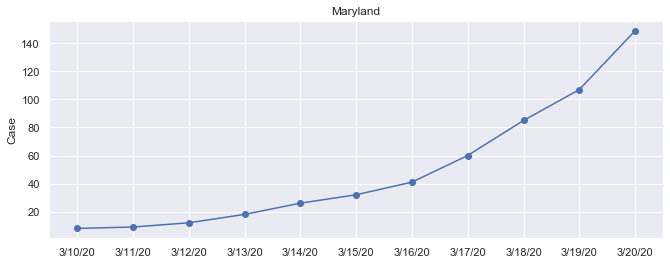

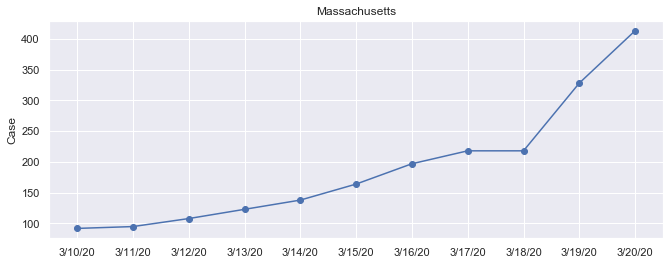

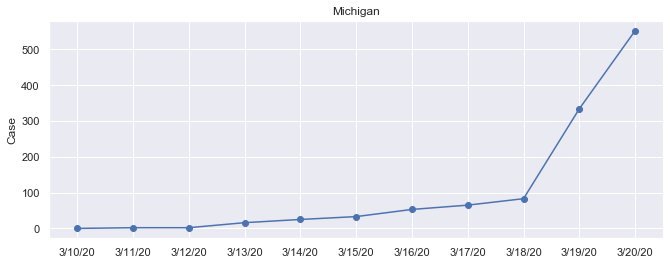

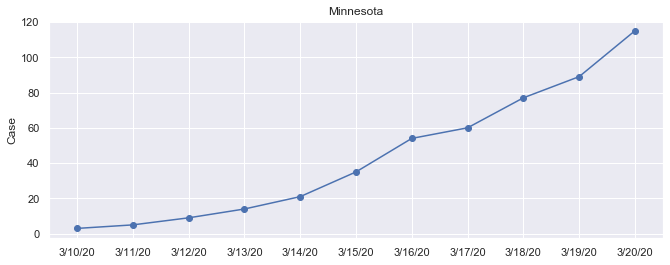

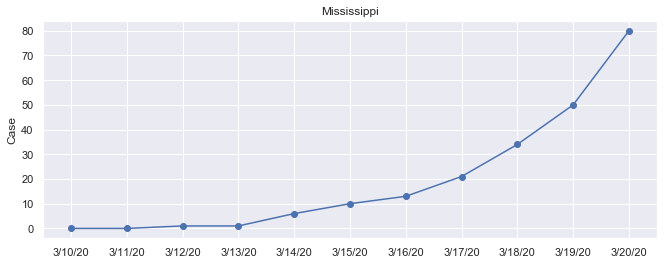

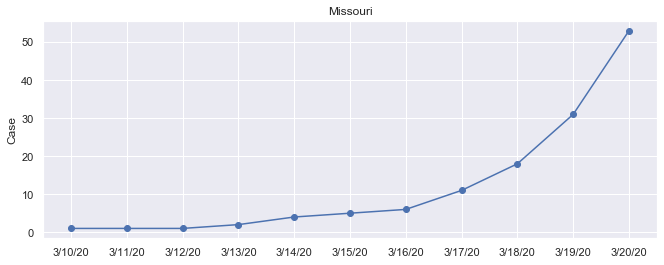

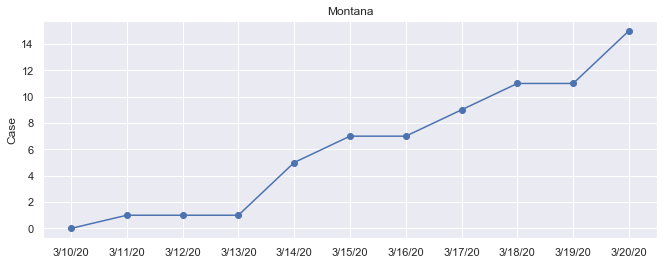

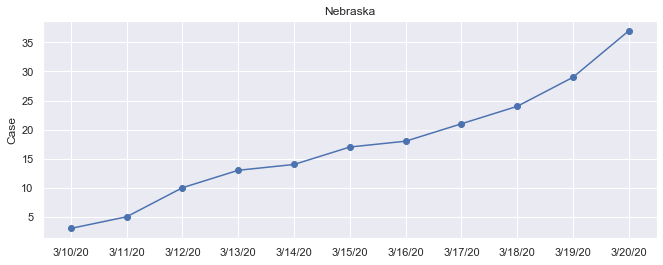

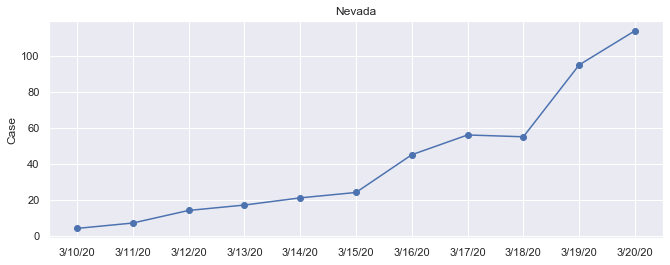

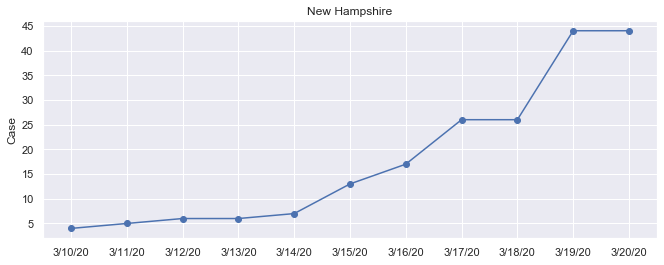

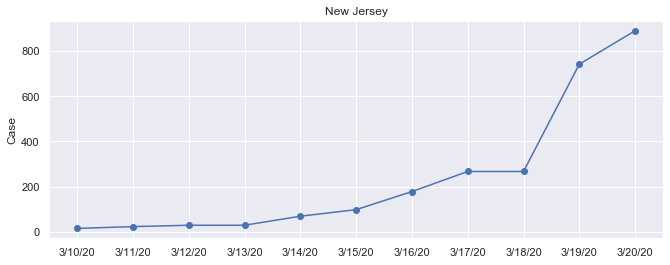

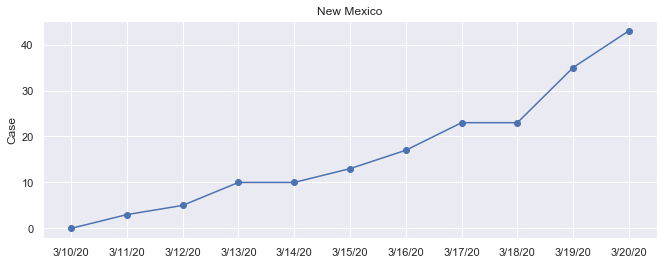

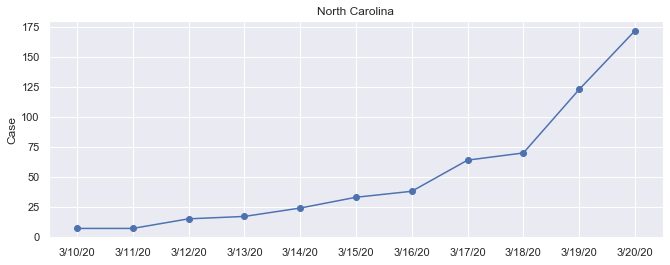

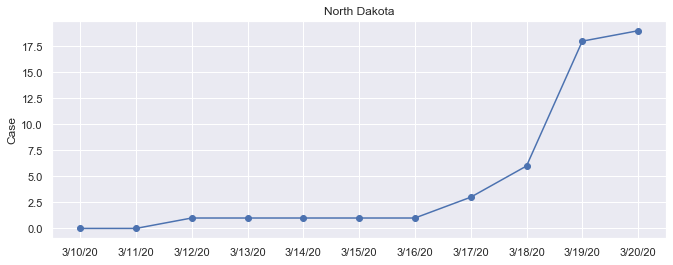

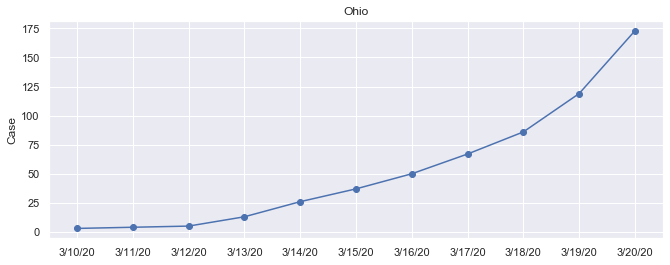

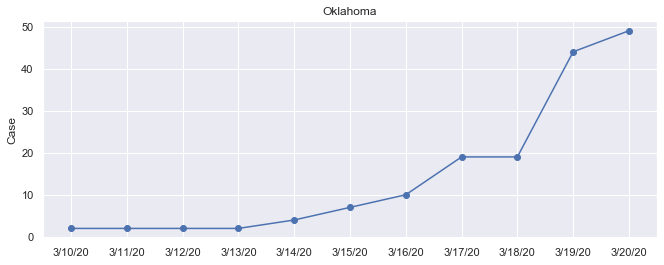

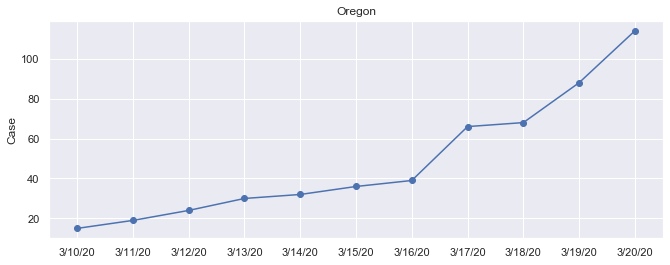

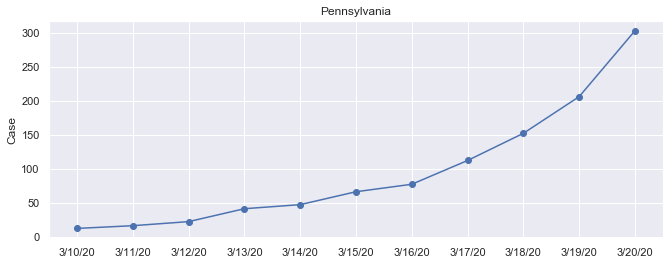

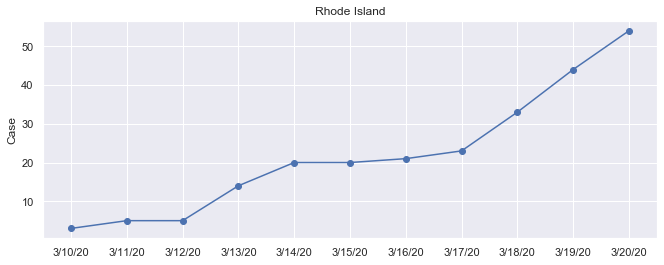

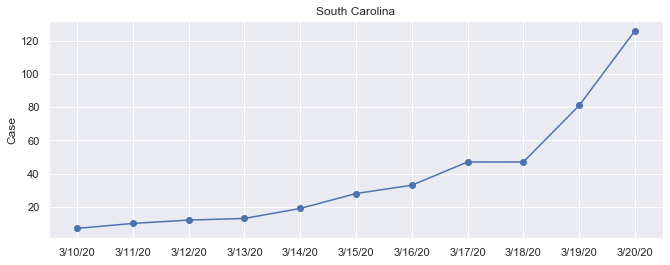

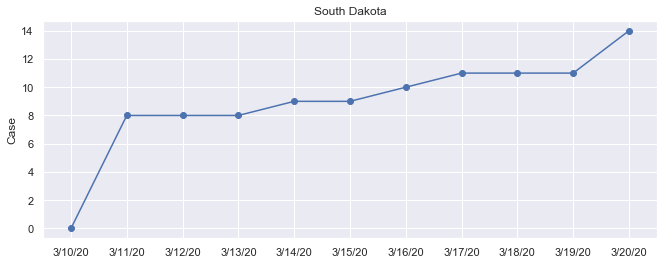

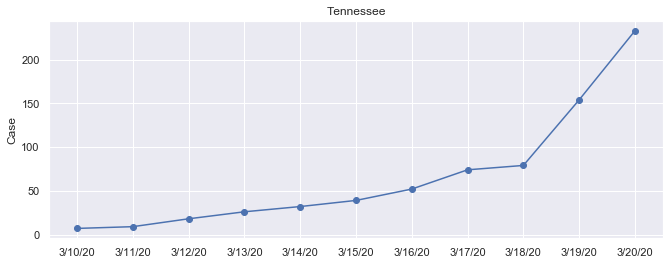

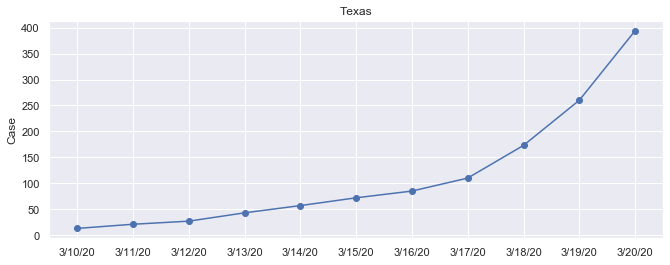

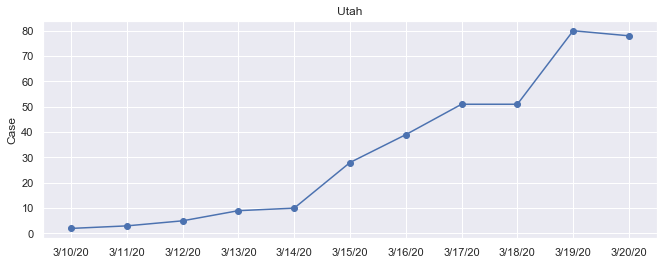

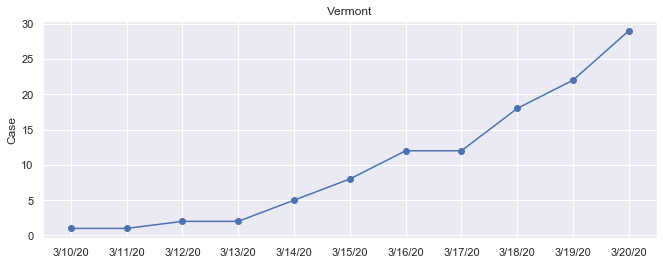

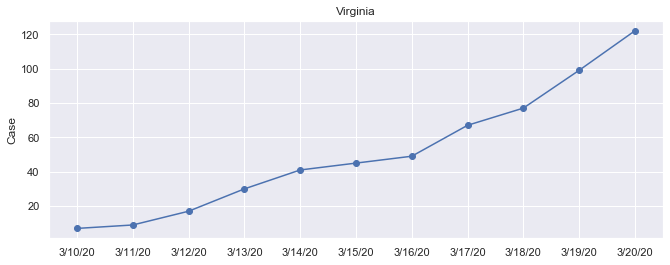

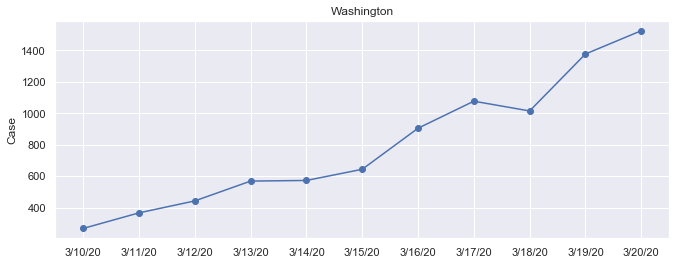

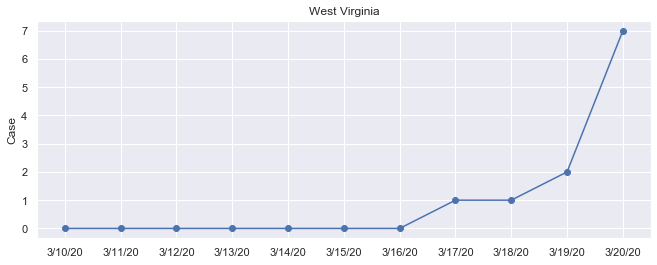

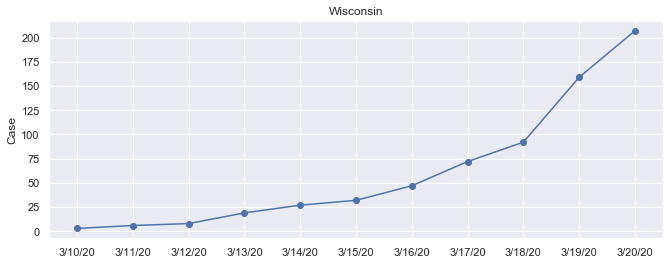

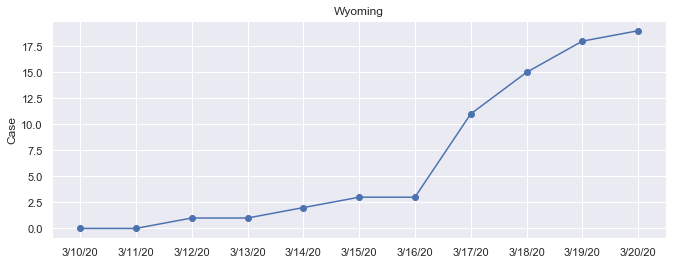

In [140]:
us_states = ["New York","California","Alabama","Alaska","Arizona","Arkansas","Colorado","Connecticut",
             "Delaware","Florida","Georgia","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky",
             "Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri",
             "Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","North Carolina",
             "North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Rhode Island","South Carolina","South Dakota",
             "Tennessee","Texas","Utah","Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
for i in us_states:
    fig, ax = plt.subplots()
    ax.plot(us.loc['3/10/20':'3/20/20', i], marker='o', linestyle='-')
    ax.set_ylabel('Case')
    ax.set_title(i)